## User Data Analysis

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import re
import seaborn as sns

## User Details

In [2]:
user_details_org = pd.read_csv('user_purchase_data.csv')

In [3]:
user_details = user_details_org

In [4]:
user_details.head()

,user_uid,date_joined,date_of_first_purhcase
0,6,2021-06-04,2021-06-04
1,608,2021-06-04,NaN
2,635,2021-06-04,NaN
3,745,2021-06-04,NaN
4,1506,2021-06-04,NaN


asuming the user_uid that have date_of_first_purhcase are paid users, created a boolean varible purchased

In [5]:
user_details[['paid_user']]=user_details[['date_of_first_purhcase']].notnull()

In [6]:
user_details.paid_user.value_counts()

True     576
False    424
Name: paid_user, dtype: int64

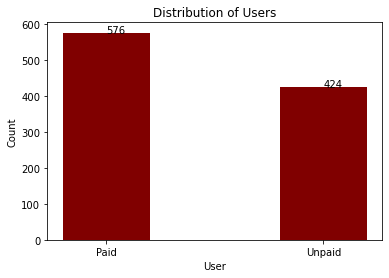

In [7]:
user = ['Paid','Unpaid']
plt.bar(user,user_details.paid_user.value_counts(),color = 'maroon',width = 0.4)
plt.title("Distribution of Users")
plt.xlabel("User")
plt.ylabel("Count")

for index, value in enumerate(user_details.paid_user.value_counts()):
    plt.text(index, value, str(value))

plt.title
plt.show()

There are 576 paid users and 424 unpaid users

In [8]:
# convert object to date
user_details['date_joined'] = pd.to_datetime(user_details.date_joined)
user_details['date_of_first_purhcase']=pd.to_datetime(user_details.date_of_first_purhcase)
user_details['date_diff'] = abs(user_details.date_of_first_purhcase - user_details.date_joined)

In [9]:
user_details.head()

,user_uid,date_joined,date_of_first_purhcase,paid_user,date_diff
0,6,2021-06-04,2021-06-04,True,0 days
1,608,2021-06-04,NaT,False,NaT
2,635,2021-06-04,NaT,False,NaT
3,745,2021-06-04,NaT,False,NaT
4,1506,2021-06-04,NaT,False,NaT


In [10]:
user_details['ddiff'] = user_details.date_diff.dt.days

In [11]:
def w(row):
    if row['ddiff']>=0 and row['ddiff']<=7:
        val = 'Week 1'
    elif row['ddiff']>=8 and row['ddiff']<=14:
        val = 'Week 2'
    elif row['ddiff']>=15 and row['ddiff']<=21:
        val = 'Week 3'
    elif row['ddiff']>=22 and row['ddiff']<=28:
        val = 'Week 4'
    else:val = 'After a Month'
    return val

In [12]:
user_details['paid_user_from'] = user_details[user_details.paid_user==True].apply(w,axis = 1)

In [13]:
user_details.head()

,user_uid,date_joined,date_of_first_purhcase,paid_user,date_diff,ddiff,paid_user_from
0,6,2021-06-04,2021-06-04,True,0 days,0.0,Week 1
1,608,2021-06-04,NaT,False,NaT,NaN,NaN
2,635,2021-06-04,NaT,False,NaT,NaN,NaN
3,745,2021-06-04,NaT,False,NaT,NaN,NaN
4,1506,2021-06-04,NaT,False,NaT,NaN,NaN


In [14]:
user_details.shape

(1000, 7)

In [15]:
paid_user_in_weeks = user_details.paid_user_from.value_counts()

In [16]:
paid_user_in_weeks

Week 1           490
Week 2            38
Week 3            24
Week 4            13
After a Month     11
Name: paid_user_from, dtype: int64

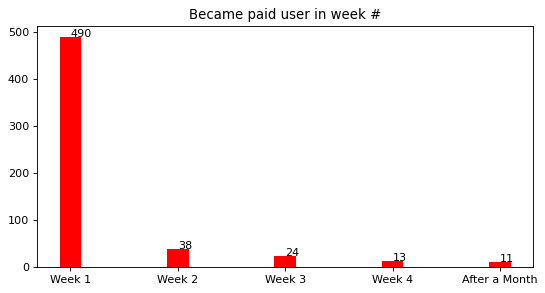

In [17]:
plt.figure(figsize=(8,4), dpi=80)
plt.bar(paid_user_in_weeks.index,paid_user_in_weeks.values,color = 'red',width = 0.2)
plt.title("Became paid user in week #")

for index, value in enumerate(paid_user_in_weeks):
    plt.text(index, value, str(value))

plt.title
plt.show()

## Course Details

In [18]:
course_details = pd.read_csv('track_subscription_data.csv')

In [19]:
course_details.head()

,user_id,track_slug,subscription_date
0,6,kerala-psc,2021-06-04
1,6,KTET,2021-06-04
2,608,spoken-english,2021-06-04
3,608,APPSC,2021-06-04
4,608,Eng_With_Awal,2021-06-04


In [20]:
len(course_details.user_id.unique())

962

identified 962 unique values for user_id

In [21]:
course = course_details.track_slug.value_counts().head(10)

In [22]:
course

Spoken_eng_hindi    284
spoken-english      213
kerala-psc          163
BANK-INS             64
ssc                  57
Eng_Inver_Coc        56
TNPSC                56
rrb                  53
Apti_ess             44
Anb_eng              43
Name: track_slug, dtype: int64

In [23]:
user_details.head()

,user_uid,date_joined,date_of_first_purhcase,paid_user,date_diff,ddiff,paid_user_from
0,6,2021-06-04,2021-06-04,True,0 days,0.0,Week 1
1,608,2021-06-04,NaT,False,NaT,NaN,NaN
2,635,2021-06-04,NaT,False,NaT,NaN,NaN
3,745,2021-06-04,NaT,False,NaT,NaN,NaN
4,1506,2021-06-04,NaT,False,NaT,NaN,NaN


In [24]:
#renaming user_uid
user=user_details.rename(columns = {'user_uid':'user_id'})

In [25]:
user.head()

,user_id,date_joined,date_of_first_purhcase,paid_user,date_diff,ddiff,paid_user_from
0,6,2021-06-04,2021-06-04,True,0 days,0.0,Week 1
1,608,2021-06-04,NaT,False,NaT,NaN,NaN
2,635,2021-06-04,NaT,False,NaT,NaN,NaN
3,745,2021-06-04,NaT,False,NaT,NaN,NaN
4,1506,2021-06-04,NaT,False,NaT,NaN,NaN


In [26]:
#merging  
user_det = pd.merge(user,course_details,how = 'left',on = 'user_id',indicator=True)

In [27]:
user_det.shape

(1616, 10)

In [28]:
user_det.head()

,user_id,date_joined,date_of_first_purhcase,paid_user,date_diff,ddiff,paid_user_from,track_slug,subscription_date,_merge
0,6,2021-06-04,2021-06-04,True,0 days,0.0,Week 1,kerala-psc,2021-06-04,both
1,6,2021-06-04,2021-06-04,True,0 days,0.0,Week 1,KTET,2021-06-04,both
2,608,2021-06-04,NaT,False,NaT,NaN,NaN,spoken-english,2021-06-04,both
3,608,2021-06-04,NaT,False,NaT,NaN,NaN,APPSC,2021-06-04,both
4,608,2021-06-04,NaT,False,NaT,NaN,NaN,Eng_With_Awal,2021-06-04,both


In [29]:
#renaming
user_det = user_det.rename(columns={'_merge':'Source'})

In [30]:
user_det.head()

,user_id,date_joined,date_of_first_purhcase,paid_user,date_diff,ddiff,paid_user_from,track_slug,subscription_date,Source
0,6,2021-06-04,2021-06-04,True,0 days,0.0,Week 1,kerala-psc,2021-06-04,both
1,6,2021-06-04,2021-06-04,True,0 days,0.0,Week 1,KTET,2021-06-04,both
2,608,2021-06-04,NaT,False,NaT,NaN,NaN,spoken-english,2021-06-04,both
3,608,2021-06-04,NaT,False,NaT,NaN,NaN,APPSC,2021-06-04,both
4,608,2021-06-04,NaT,False,NaT,NaN,NaN,Eng_With_Awal,2021-06-04,both


In [31]:
user_det.Source.value_counts()

both          1578
left_only       38
right_only       0
Name: Source, dtype: int64

In [32]:
user_det[user_det.Source=='left_only'].shape

(38, 10)

In [33]:
user_det[user_det.Source=='left_only']

,user_id,date_joined,date_of_first_purhcase,paid_user,date_diff,ddiff,paid_user_from,track_slug,subscription_date,Source
57,13061,2021-06-06,NaT,False,NaT,NaN,NaN,NaN,NaN,left_only
110,24366,2021-06-07,NaT,False,NaT,NaN,NaN,NaN,NaN,left_only
181,36042,2021-06-09,NaT,False,NaT,NaN,NaN,NaN,NaN,left_only
243,53892,2021-06-11,NaT,False,NaT,NaN,NaN,NaN,NaN,left_only
350,85028,2021-06-15,NaT,False,NaT,NaN,NaN,NaN,NaN,left_only
488,120235,2021-06-19,NaT,False,NaT,NaN,NaN,NaN,NaN,left_only
507,125187,2021-06-20,NaT,False,NaT,NaN,NaN,NaN,NaN,left_only
533,134461,2021-06-21,NaT,False,NaT,NaN,NaN,NaN,NaN,left_only
635,146428,2021-06-23,NaT,False,NaT,NaN,NaN,NaN,NaN,left_only
683,156464,2021-06-25,NaT,False,NaT,NaN,NaN,NaN,NaN,left_only


course details are missing for 38 unpaid users, May be they are just passive viewers

In [34]:
#subseting to users in both df
user_det1 = user_det[user_det.Source == 'both']

In [35]:
user_det1.shape

(1578, 10)

In [36]:
len(user_det1[user_det1.paid_user==True].user_id.unique())

576

course details for 576 paid users are available

In [37]:
len(user_det1[user_det1.paid_user==False].user_id.unique())

386

course details for 386 unpaid users are available

In [38]:
top_10_course = user_det1.track_slug.value_counts().head(10)

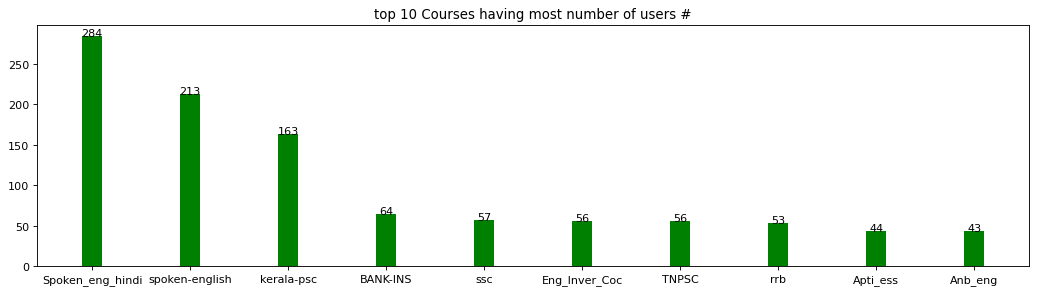

In [39]:
plt.figure(figsize=(16,4), dpi=80)
plt.bar(top_10_course.index,top_10_course.values,color = 'g',width = 0.2)
plt.title("top 10 Courses having most number of users #")

for index, value in enumerate(top_10_course):
    plt.text(index, value, str(value),ha = 'center')

plt.title
plt.show()

In [40]:
top10_paid = {}
top10_unpaid = {}
for i in top_10_course.index:
    top10_paid[i] = user_det1[user_det1.paid_user==True].track_slug.value_counts()[i]
    top10_unpaid[i] = user_det1[user_det1.paid_user==False].track_slug.value_counts()[i]

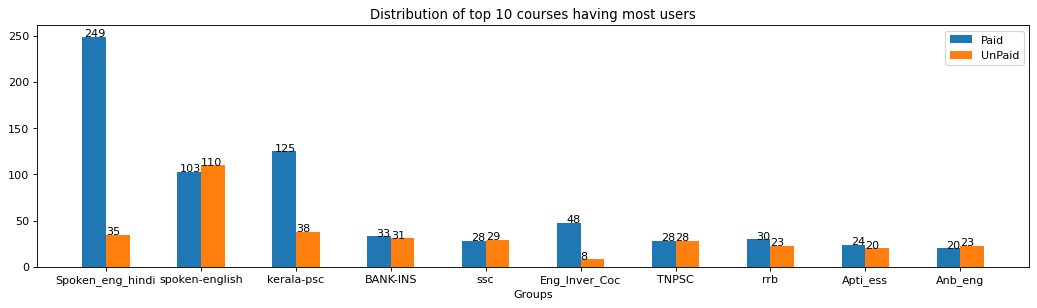

In [41]:
X = top_10_course.index
Ygirls = [10,20,20,40]
Zboys = [20,30,25,30]
  
X_axis = np.arange(len(X))
plt.figure(figsize=(16,4), dpi=80)  
plt.bar(X_axis - 0.125, top10_paid.values(), 0.25, label = 'Paid')

for index, value in enumerate(top10_paid.values()):
    plt.text(index, value, str(value),ha = 'right')
    
plt.bar(X_axis + 0.125, top10_unpaid.values(), 0.25, label = 'UnPaid')

for index, value in enumerate(top10_unpaid.values()):
    plt.text(index, value, str(value),ha = 'left')
  
plt.xticks(X_axis, X)
plt.xlabel("Groups")
#plt.ylabel("Number of Users")
plt.title("Distribution of top 10 courses having most users")
plt.legend()
plt.show()

In [42]:
paid_course = user_det1[user_det1.paid_user==True].track_slug.value_counts().sort_values(ascending = False).head(10)

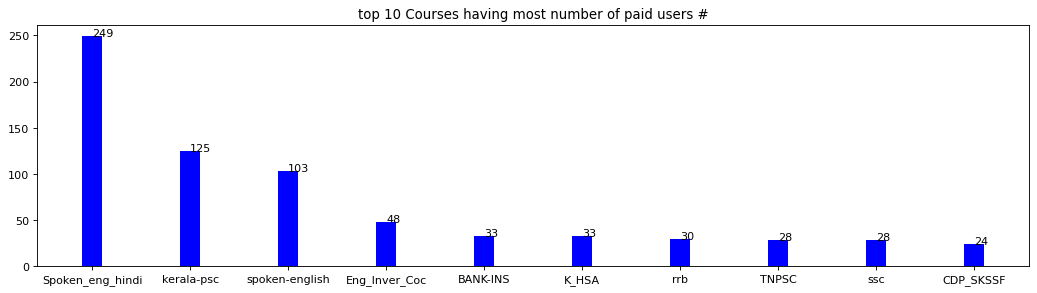

In [43]:
plt.figure(figsize=(16,4), dpi=80)
plt.bar(paid_course.index,paid_course.values,color = 'blue',width = 0.2)
plt.title("top 10 Courses having most number of paid users #")

for index, value in enumerate(paid_course):
    plt.text(index, value, str(value))

plt.title
plt.show()

In [44]:
unpaid_course = user_det1[user_det1.paid_user==False].track_slug.value_counts().sort_values(ascending = False).head(10)

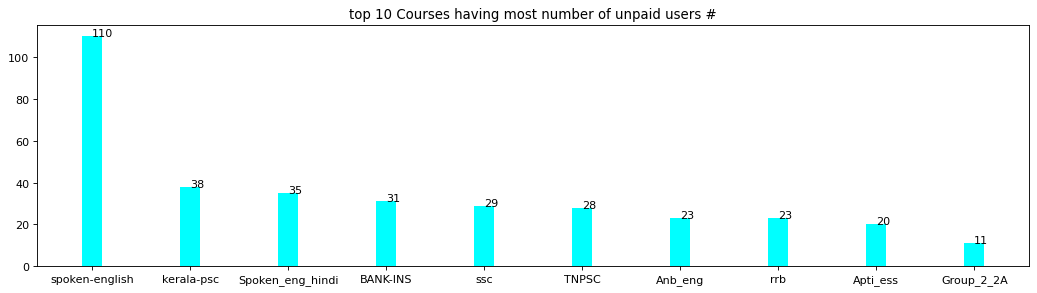

In [45]:
plt.figure(figsize=(16,4), dpi=80)
plt.bar(unpaid_course.index,unpaid_course.values,color = 'cyan',width = 0.2)
plt.title("top 10 Courses having most number of unpaid users #")

for index, value in enumerate(unpaid_course):
    plt.text(index, value, str(value))

plt.title
plt.show()

In [46]:
user_det['subscription_date'] = pd.to_datetime(user_det.subscription_date)

In [47]:
user_det[(user_det.subscription_date.dt.date!=user_det.date_joined.dt.date)].shape

(395, 10)

In [48]:
user_det[user_det.subscription_date.notnull()].shape

(1578, 10)

## Quiz Details

In [49]:
quiz_details = pd.read_csv('user_quiz_attempt_data.csv')

In [50]:
quiz_details.head()

,user_id,attempt_id,started_at,status,no_of_questions,question_attempted
0,1506,50839743,None,CREATE,10,0
1,1506,50839752,None,PAUSE,10,10
2,1642,50842794,2021-06-04 16:52:25.634573+00:00,COMPLETE,10,10
3,1642,50843057,2021-06-04 16:55:37.917805+00:00,COMPLETE,10,10
4,1642,50843164,None,CREATE,10,0


In [51]:
quiz_details.shape

(21419, 6)

In [52]:
user1 = pd.read_csv('user_purchase_data.csv')

In [53]:
user1.head()

,user_uid,date_joined,date_of_first_purhcase
0,6,2021-06-04,2021-06-04
1,608,2021-06-04,NaN
2,635,2021-06-04,NaN
3,745,2021-06-04,NaN
4,1506,2021-06-04,NaN


In [54]:
user1 = user1.rename(columns={'user_uid':'user_id'})

In [55]:
comb_data1 = pd.merge(user1,quiz_details,how = 'left',on = 'user_id')

In [56]:
comb_data1.head()

,user_id,date_joined,date_of_first_purhcase,attempt_id,started_at,status,no_of_questions,question_attempted
0,6,2021-06-04,2021-06-04,50855054.0,None,COMPLETE,30.0,0.0
1,6,2021-06-04,2021-06-04,51099465.0,2021-06-07 14:42:33.555259+00:00,COMPLETE,30.0,30.0
2,6,2021-06-04,2021-06-04,51101002.0,2021-06-07 17:27:42.960916+00:00,COMPLETE,30.0,9.0
3,6,2021-06-04,2021-06-04,51117646.0,2021-06-07 17:52:13.175348+00:00,COMPLETE,30.0,0.0
4,6,2021-06-04,2021-06-04,51119007.0,2021-06-08 10:51:48.563511+00:00,COMPLETE,15.0,10.0


In [57]:
comb_data1['paid_user'] = comb_data1.date_of_first_purhcase.notnull()

In [64]:
number_attempts = comb_data1['attempt_id'].groupby(comb_data1.paid_user).count()

In [65]:
number_attempts

paid_user
False     1422
True     19997
Name: attempt_id, dtype: int64

[Text(0.5, 1.0, 'number of quiz attempts')]

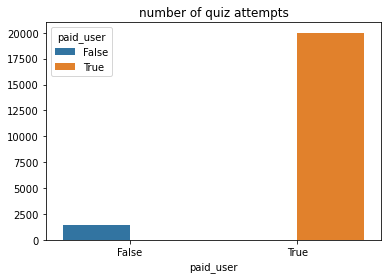

In [66]:
sns.barplot(x = number_attempts.index, y = number_attempts.values,hue = number_attempts.index).set(title = 'number of quiz attempts')

paid users are attempting more quizes

In [67]:
quiz_attempts = comb_data1.status.groupby(comb_data1.paid_user).value_counts()

In [68]:
quiz_attempts

paid_user  status  
False      COMPLETE      874
           CREATE        478
           PAUSE          54
           PROGRESS       16
True       COMPLETE    12959
           CREATE       6472
           PAUSE         435
           PROGRESS      131
Name: status, dtype: int64

## Vedio history details

In [73]:
watch_histoy = pd.read_csv('user_video_activity_data.csv')

In [76]:
watch_histoy.shape

(12907, 6)

In [77]:
watch_histoy.head()

,user_id,watch_instance_id,watched_at,video_id,duration,watched_duration
0,6,24552452,2021-06-12 18:13:40.347392+00:00,25261,934,2
1,6,24552735,2021-06-12 18:21:45.362998+00:00,25262,398,398
2,6,24011079,2021-06-04 18:27:01.296468+00:00,24920,1589,55
3,6,24011800,2021-06-04 18:51:27.450857+00:00,24531,319,28
4,6,24249571,2021-06-08 11:19:02.187747+00:00,32825,317,15


In [79]:
watch_histoy = watch_histoy[['user_id','duration','watched_duration']]

In [81]:
comb_data1.shape

(21789, 9)

In [113]:
user1['paid_user']=user1.date_of_first_purhcase.notnull()

In [114]:
user1.head()

,user_id,date_joined,date_of_first_purhcase,paid_user
0,6,2021-06-04,2021-06-04,True
1,608,2021-06-04,NaN,False
2,635,2021-06-04,NaN,False
3,745,2021-06-04,NaN,False
4,1506,2021-06-04,NaN,False


In [158]:
vedio_data = pd.merge(user1,watch_histoy,how = 'left', on = 'user_id',indicator=True)

In [159]:
vedio_data.shape

(13152, 7)

In [160]:
vedio_data.head()

,user_id,date_joined,date_of_first_purhcase,paid_user,duration,watched_duration,_merge
0,6,2021-06-04,2021-06-04,True,934.0,2.0,both
1,6,2021-06-04,2021-06-04,True,398.0,398.0,both
2,6,2021-06-04,2021-06-04,True,1589.0,55.0,both
3,6,2021-06-04,2021-06-04,True,319.0,28.0,both
4,6,2021-06-04,2021-06-04,True,317.0,15.0,both


In [162]:
vedio_data._merge.value_counts()

both          12907
left_only       245
right_only        0
Name: _merge, dtype: int64

In [164]:
vedio_data[vedio_data._merge == 'both'].user_id.nunique()

755

vedio details is available only for 755 users

In [121]:
vedio_data.duration.groupby(vedio_data.paid_user).max()

paid_user
False    5748.0
True     8514.0
Name: duration, dtype: float64

In [122]:
vedio_data.duration.groupby(vedio_data.paid_user).min()

paid_user
False    0.0
True     0.0
Name: duration, dtype: float64

more vedio content is available for paid users

[Text(0.5, 1.0, 'Paid v/s unpaid')]

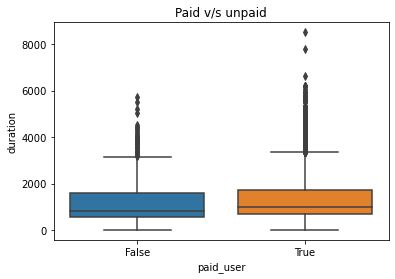

In [120]:
sns.boxplot(x="paid_user", y="duration", data=vedio_data).set(title = 'Paid v/s unpaid')

[Text(0.5, 1.0, 'Distibution of Vedio Duration')]

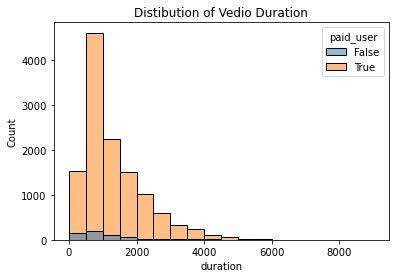

In [103]:
sns.histplot(data = vedio_data,x='duration',bins = 20,binwidth=500,hue='paid_user').set(title = 'Distibution of Vedio Duration')

[Text(0.5, 1.0, 'Distibution of Vedio Duration for unpaid users')]

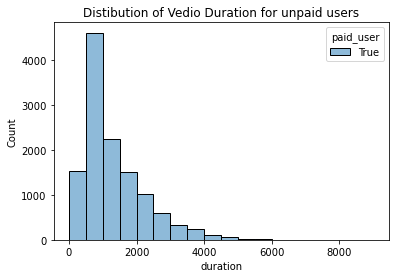

In [106]:
sns.histplot(data = vedio_data[vedio_data['paid_user']==True],x='duration',bins = 20,binwidth=500,hue='paid_user').set(title = 'Distibution of Vedio Duration for unpaid users')

[Text(0.5, 1.0, 'Distibution of Vedio Duration for unpaid users')]

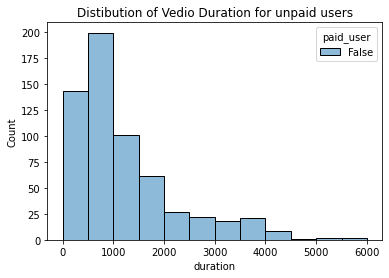

In [108]:
sns.histplot(data = vedio_data[vedio_data['paid_user']==False],x='duration',bins = 20,binwidth=500,hue='paid_user').set(title = 'Distibution of Vedio Duration for unpaid users')

[Text(0.5, 1.0, 'Distibution of Vedio Duration for unpaid users')]

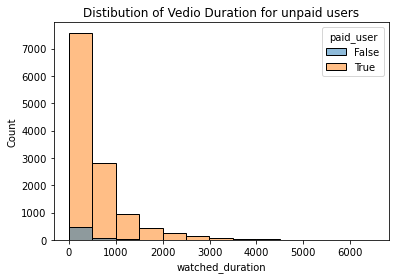

In [109]:
sns.histplot(data = vedio_data,x='watched_duration',bins = 20,binwidth=500,hue='paid_user').set(title = 'Distibution of Vedio Duration for unpaid users')

[Text(0.5, 1.0, 'Distibution of Vedio watched duration for paid users')]

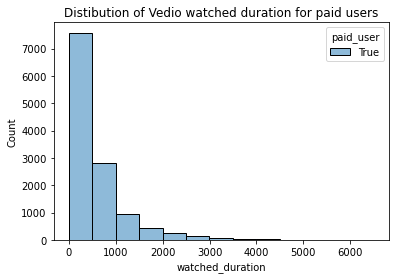

In [111]:
sns.histplot(data = vedio_data[vedio_data['paid_user']==True],x='watched_duration',bins = 20,binwidth=500,hue='paid_user').set(title = 'Distibution of Vedio watched duration for paid users')

[Text(0.5, 1.0, 'Distibution of Vedio watched duration for unpaid users')]

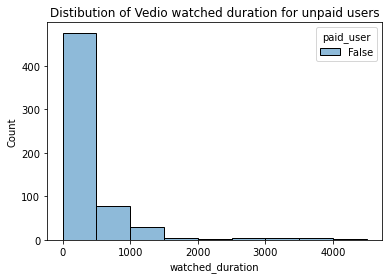

In [112]:
sns.histplot(data = vedio_data[vedio_data['paid_user']==False],x='watched_duration',bins = 20,binwidth=500,hue='paid_user').set(title = 'Distibution of Vedio watched duration for unpaid users')

In [127]:
vedio_data.watched_duration.groupby(vedio_data.paid_user).agg('sum')

paid_user
False     193751.0
True     6018156.0
Name: watched_duration, dtype: float64

In [128]:
vedio_data.watched_duration.groupby(vedio_data.paid_user).agg('mean')

paid_user
False    320.249587
True     489.201431
Name: watched_duration, dtype: float64

## study card Details

In [130]:
studycard = pd.read_csv('user_studycard_data.csv')

In [131]:
studycard.shape

(3480, 3)

In [132]:
studycard.head()

,user_id,activity_id,start_time
0,1642,4197126,2021-06-04 16:51:51.454473+00:00
1,1642,4197075,2021-06-04 16:43:10.115201+00:00
2,1642,4197074,2021-06-04 16:43:10.082261+00:00
3,1642,4197577,2021-06-04 18:20:58.487196+00:00
4,1642,4197174,2021-06-04 16:57:46.487970+00:00


In [133]:
user1.head()

,user_id,date_joined,date_of_first_purhcase,paid_user
0,6,2021-06-04,2021-06-04,True
1,608,2021-06-04,NaN,False
2,635,2021-06-04,NaN,False
3,745,2021-06-04,NaN,False
4,1506,2021-06-04,NaN,False


In [149]:
card_det =  pd.merge(user1,studycard,how = 'left',on = 'user_id',indicator=True)

In [150]:
card_det.shape

(4094, 7)

In [152]:
card_det._merge.value_counts()

both          3480
left_only      614
right_only       0
Name: _merge, dtype: int64

In [155]:
card_det[card_det._merge=='both'].user_id.nunique()

386

study card details are available only for 386 users

In [148]:
card_det.activity_id.groupby(card_det.paid_user).agg('count')

paid_user
False     155
True     3325
Name: activity_id, dtype: int64